In [1]:
!pwd

/Users/qingqingzhang/Desktop/Capstone_Project


In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

hexagons = gpd.read_file('../Capstone_Project/cusp_capstone/data_for_notebooks/hexagons.geojson')

In [4]:
hexagons.head()

,hex_id_8,geometry
0,882a100f47fffff,"POLYGON ((309177.150 70241.423, 308638.240 701..."
1,882a100f43fffff,"POLYGON ((309756.428 68989.222, 310295.305 691..."
2,882a100f55fffff,"POLYGON ((309756.428 68989.222, 309590.261 684..."
3,882a100f5dfffff,"POLYGON ((311000.393 69719.010, 310461.496 696..."
4,882a100f09fffff,"POLYGON ((309756.428 68989.222, 309383.716 693..."


In [5]:
hexagons.shape

(1199, 2)

In [9]:
citibike_stations = pd.read_csv('citibike_station.csv')

In [10]:
citibike_stations.shape

(911, 12)

In [11]:
citibike_stations.head()

,Id,stationName,AvailableDocks,totalDocks,latitude,longitude,StatusValue,StatusKey,availableBikes,Address,lastCommunicationTime,State
0,281,Grand Army Plaza & Central Park S,47,66,40.764397,-73.973715,In Service,1,19,Grand Army Plaza & Central Park S,11/18/19 14:21,NY
1,304,Broadway & Battery Pl,20,33,40.704633,-74.013617,In Service,1,10,Broadway & Battery Pl,11/18/19 14:24,NY
2,337,Old Slip & Front St,32,37,40.703799,-74.008387,In Service,1,4,Old Slip & Front St,11/18/19 14:24,NY
3,347,Greenwich St & W Houston St,25,35,40.728846,-74.008591,In Service,1,9,Greenwich St & W Houston St,11/18/19 14:24,NY
4,359,E 47 St & Park Ave,30,64,40.755103,-73.974987,In Service,1,33,E 47 St & Park Ave,11/18/19 14:21,NY


In [23]:
gdf_citibike_stations = gpd.GeoDataFrame(citibike_stations, geometry=gpd.points_from_xy(citibike_stations.longitude, citibike_stations.latitude))

In [27]:
gdf_citibike_stations.head()

,Id,stationName,AvailableDocks,totalDocks,latitude,longitude,StatusValue,StatusKey,availableBikes,Address,lastCommunicationTime,State,geometry
0,281,Grand Army Plaza & Central Park S,47,66,40.764397,-73.973715,In Service,1,19,Grand Army Plaza & Central Park S,11/18/19 14:21,NY,POINT (302219.370 66375.914)
1,304,Broadway & Battery Pl,20,33,40.704633,-74.013617,In Service,1,10,Broadway & Battery Pl,11/18/19 14:24,NY,POINT (298849.229 59738.998)
2,337,Old Slip & Front St,32,37,40.703799,-74.008387,In Service,1,4,Old Slip & Front St,11/18/19 14:24,NY,POINT (299291.230 59646.313)
3,347,Greenwich St & W Houston St,25,35,40.728846,-74.008591,In Service,1,9,Greenwich St & W Houston St,11/18/19 14:24,NY,POINT (299274.243 62427.716)
4,359,E 47 St & Park Ave,30,64,40.755103,-73.974987,In Service,1,33,E 47 St & Park Ave,11/18/19 14:21,NY,POINT (302112.239 65343.747)


In [25]:
gdf_citibike_stations.crs = {'init' :'epsg:4326'}

/Users/qingqingzhang/anaconda3/envs/Newenv/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [26]:
gdf_citibike_stations = gdf_citibike_stations.to_crs(epsg=3627)

In [28]:
citibike_stations_locations = gdf_citibike_stations[['Id','stationName','geometry']]

In [32]:
citibike_stations_locations.shape

(911, 3)

In [30]:
sjoined_citibike = gpd.sjoin(citibike_stations_locations, hexagons, op='within')

In [31]:
sjoined_citibike.shape

(856, 5)

In [34]:
sjoined_citibike.head(100)

,Id,stationName,geometry,index_right,hex_id_8
0,281,Grand Army Plaza & Central Park S,POINT (302219.370 66375.914),1171,882a100d61fffff
5,367,E 53 St & Lexington Ave,POINT (302474.616 65696.770),1171,882a100d61fffff
12,520,W 52 St & 5 Ave,POINT (301985.579 65878.962),1171,882a100d61fffff
198,456,E 53 St & Madison Ave,POINT (302193.480 65855.498),1171,882a100d61fffff
250,522,E 51 St & Lexington Ave,POINT (302357.785 65570.906),1171,882a100d61fffff
...,...,...,...,...,...
148,386,Centre St & Worth St,POINT (299801.871 60884.342),1128,882a1072c3fffff
169,412,Forsyth St & Canal St,POINT (300488.074 60980.682),1128,882a1072c3fffff
19,83,Atlantic Ave & Fort Greene Pl,POINT (302001.532 57428.573),540,882a100da7fffff
206,467,Dean St & 4 Ave,POINT (301779.383 57350.656),540,882a100da7fffff


In [36]:
len(sjoined_citibike.hex_id_8.unique())

159

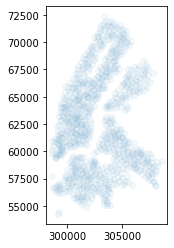

In [37]:
sjoined_citibike.plot(alpha=0.05)

In [39]:
sjoined_citibike.to_file("../Capstone_Project/cusp_capstone/data_for_notebooks/sjoined_citibike.geojson",
                         driver='GeoJSON')

In [40]:
taxidemand = gpd.read_file('../Capstone_Project/cusp_capstone/data_for_notebooks/hexbinned_data/taxidemand_hexbinned.geojson')

In [41]:
taxidemand.head()

,uid,month,day,night?,weekday,inflow_counts,outflow_counts,hex_id_8,night_pop,day_pop,geometry
0,110,1,1,0,Tuesday,7,7,882a100f47fffff,4581.0,5304.0,"POLYGON ((309177.150 70241.423, 308638.240 701..."
1,110,1,1,0,Tuesday,0,0,882a100f43fffff,8570.0,10200.0,"POLYGON ((309756.428 68989.222, 310295.305 691..."
2,110,1,1,0,Tuesday,0,0,882a100f55fffff,550.0,626.0,"POLYGON ((309756.428 68989.222, 309590.261 684..."
3,110,1,1,0,Tuesday,0,0,882a100f5dfffff,2234.0,2673.0,"POLYGON ((311000.393 69719.010, 310461.496 696..."
4,110,1,1,0,Tuesday,3,3,882a100f09fffff,2468.0,2680.0,"POLYGON ((309756.428 68989.222, 309383.716 693..."


In [42]:
taxidemand.shape

(288959, 11)

In [61]:
len(taxidemand[taxidemand.uid == '4301'].hex_id_8.unique())

1199

In [43]:
taxidemand.uid.unique()

array(['110', '111', '120', '121', '130', '131', '140', '141', '150',
       '151', '160', '161', '170', '171', '180', '181', '190', '191',
       '1100', '1101', '1110', '1111', '1120', '1121', '1130', '1131',
       '1140', '1141', '1150', '1151', '1160', '1161', '1170', '1171',
       '1180', '1181', '1190', '1191', '1200', '1201', '1210', '1211',
       '1220', '1221', '1230', '1231', '1240', '1241', '1250', '1251',
       '1260', '1261', '1270', '1271', '1280', '1281', '1290', '1291',
       '1300', '1301', '1310', '1311', '210', '211', '220', '221', '230',
       '231', '240', '241', '250', '251', '260', '261', '270', '271',
       '280', '281', '290', '291', '2100', '2101', '2110', '2111', '2120',
       '2121', '2130', '2131', '2140', '2141', '2150', '2151', '2160',
       '2161', '2170', '2171', '2180', '2181', '2190', '2191', '2200',
       '2201', '2210', '2211', '2220', '2221', '2230', '2231', '2240',
       '2241', '2250', '2251', '2260', '2261', '2270', '2271', '2280',
  

In [44]:
pluto = gpd.read_file('../Capstone_Project/cusp_capstone/data_for_notebooks/hexbinned_data/pluto_hexbinned.geojson')

In [45]:
pluto.head()

,hex_id_8,LotArea,ComArea,ResArea,OfficeArea,RetailArea,FactryArea,NumBldgs,geometry
0,882a100005fffff,74923296,293161,55067,67758,12878,0,168,"POLYGON ((317847.498 76722.030, 317308.379 766..."
1,882a100007fffff,4418897,191414,575012,29667,113766,5350,509,"POLYGON ((317141.941 76108.944, 317308.379 766..."
2,882a10000bfffff,4855000,144908,25500,49786,0,0,19,"POLYGON ((319670.996 76199.205, 319837.502 766..."
3,882a10001dfffff,5032085,144908,25500,49786,0,0,19,"POLYGON ((319131.891 76081.984, 319670.996 761..."
4,882a100021fffff,90087500,275021,0,66208,1603,0,109,"POLYGON ((315484.726 77127.665, 316023.859 772..."


In [46]:
pluto.shape

(1196, 9)

In [47]:
pop = gpd.read_file('../Capstone_Project/cusp_capstone/data_for_notebooks/hexbinned_data/population_hexbinned.geojson')

In [48]:
pop.head()

,hex_id_8,day_pop,night_pop,night_day_delta,day_night_delta,geometry
0,882a100f47fffff,5304,4581,-723,723,"POLYGON ((309177.150 70241.423, 308638.240 701..."
1,882a100f43fffff,10200,8570,-1630,1630,"POLYGON ((309756.428 68989.222, 310295.305 691..."
2,882a100f55fffff,626,550,-76,76,"POLYGON ((309756.428 68989.222, 309590.261 684..."
3,882a100f5dfffff,2673,2234,-439,439,"POLYGON ((311000.393 69719.010, 310461.496 696..."
4,882a100f09fffff,2680,2468,-212,212,"POLYGON ((309756.428 68989.222, 309383.716 693..."


In [49]:
pop.shape

(1199, 6)

In [50]:
venue = gpd.read_file('../Capstone_Project/cusp_capstone/data_for_notebooks/hexbinned_data/venues_hexbinned.geojson')

In [51]:
venue.head()

,hex_id_8,count,geometry
0,882a100d65fffff,144.0,"POLYGON ((301714.781 65863.222, 301880.715 663..."
1,882a1072cbfffff,136.0,"POLYGON ((300594.554 61028.530, 301133.174 611..."
2,882a100d2dfffff,110.0,"POLYGON ((301010.106 65250.815, 300471.361 651..."
3,882a10725bfffff,103.0,"POLYGON ((301010.106 65250.815, 301176.016 657..."
4,882a100d67fffff,100.0,"POLYGON ((301714.781 65863.222, 301176.016 657..."


In [52]:
venue.shape

(1199, 3)

In [62]:
# Aggregate MTA stations based on taxi zones
stations = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')
stations.head()

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label
0,1,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan


In [63]:
join_table = pd.read_csv('Remote-Booth-Station - turnstiles 2013.csv')
join_table.head()

,Remote,Booth,stop_id.2013,Station.2013,Line.2013,Division.2013
0,R051,A002,R11,LEXINGTON AVE,456NQR,BMT
1,R050,A004,R11,LEXINGTON AVE,456NQR,BMT
2,R079,A006,R13,5 AVE-59 ST,NQR,BMT
3,R079,A007,R13,5 AVE-59 ST,NQR,BMT
4,R080,A010,R14,57 ST-7 AVE,NQR,BMT


In [64]:
stations_booth = pd.merge(join_table ,stations,how='left',left_on='stop_id.2013',right_on='GTFS Stop ID')
stations_booth.head()

,Remote,Booth,stop_id.2013,Station.2013,Line.2013,Division.2013,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label
0,R051,A002,R11,LEXINGTON AVE,456NQR,BMT,7.0,613.0,R11,BMT,Astoria,Lexington Av/59 St,M,N W R,Subway,40.762660,-73.967258,Queens,Downtown & Brooklyn
1,R050,A004,R11,LEXINGTON AVE,456NQR,BMT,7.0,613.0,R11,BMT,Astoria,Lexington Av/59 St,M,N W R,Subway,40.762660,-73.967258,Queens,Downtown & Brooklyn
2,R079,A006,R13,5 AVE-59 ST,NQR,BMT,8.0,8.0,R13,BMT,Astoria,5 Av/59 St,M,N W R,Subway,40.764811,-73.973347,Queens,Downtown & Brooklyn
3,R079,A007,R13,5 AVE-59 ST,NQR,BMT,8.0,8.0,R13,BMT,Astoria,5 Av/59 St,M,N W R,Subway,40.764811,-73.973347,Queens,Downtown & Brooklyn
4,R080,A010,R14,57 ST-7 AVE,NQR,BMT,9.0,9.0,R14,BMT,Broadway - Brighton,57 St - 7 Av,M,N Q R W,Subway,40.764664,-73.980658,Uptown & Queens,Downtown & Brooklyn


In [65]:
gdf_subway_stations = gpd.GeoDataFrame(stations_booth, geometry=gpd.points_from_xy(stations_booth['GTFS Longitude'], stations_booth['GTFS Latitude']))

In [66]:
gdf_subway_stations.head()

,Remote,Booth,stop_id.2013,Station.2013,Line.2013,Division.2013,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,geometry
0,R051,A002,R11,LEXINGTON AVE,456NQR,BMT,7.0,613.0,R11,BMT,Astoria,Lexington Av/59 St,M,N W R,Subway,40.762660,-73.967258,Queens,Downtown & Brooklyn,POINT (-73.96726 40.76266)
1,R050,A004,R11,LEXINGTON AVE,456NQR,BMT,7.0,613.0,R11,BMT,Astoria,Lexington Av/59 St,M,N W R,Subway,40.762660,-73.967258,Queens,Downtown & Brooklyn,POINT (-73.96726 40.76266)
2,R079,A006,R13,5 AVE-59 ST,NQR,BMT,8.0,8.0,R13,BMT,Astoria,5 Av/59 St,M,N W R,Subway,40.764811,-73.973347,Queens,Downtown & Brooklyn,POINT (-73.97335 40.76481)
3,R079,A007,R13,5 AVE-59 ST,NQR,BMT,8.0,8.0,R13,BMT,Astoria,5 Av/59 St,M,N W R,Subway,40.764811,-73.973347,Queens,Downtown & Brooklyn,POINT (-73.97335 40.76481)
4,R080,A010,R14,57 ST-7 AVE,NQR,BMT,9.0,9.0,R14,BMT,Broadway - Brighton,57 St - 7 Av,M,N Q R W,Subway,40.764664,-73.980658,Uptown & Queens,Downtown & Brooklyn,POINT (-73.98066 40.76466)


In [67]:
gdf_subway_stations.crs = {'init' :'epsg:4326'}
gdf_subway_stations = gdf_subway_stations.to_crs(epsg=3627)

/Users/qingqingzhang/anaconda3/envs/Newenv/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [68]:
gdf_subway_stations.head()

,Remote,Booth,stop_id.2013,Station.2013,Line.2013,Division.2013,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,geometry
0,R051,A002,R11,LEXINGTON AVE,456NQR,BMT,7.0,613.0,R11,BMT,Astoria,Lexington Av/59 St,M,N W R,Subway,40.762660,-73.967258,Queens,Downtown & Brooklyn,POINT (302764.601 66183.195)
1,R050,A004,R11,LEXINGTON AVE,456NQR,BMT,7.0,613.0,R11,BMT,Astoria,Lexington Av/59 St,M,N W R,Subway,40.762660,-73.967258,Queens,Downtown & Brooklyn,POINT (302764.601 66183.195)
2,R079,A006,R13,5 AVE-59 ST,NQR,BMT,8.0,8.0,R13,BMT,Astoria,5 Av/59 St,M,N W R,Subway,40.764811,-73.973347,Queens,Downtown & Brooklyn,POINT (302250.398 66421.887)
3,R079,A007,R13,5 AVE-59 ST,NQR,BMT,8.0,8.0,R13,BMT,Astoria,5 Av/59 St,M,N W R,Subway,40.764811,-73.973347,Queens,Downtown & Brooklyn,POINT (302250.398 66421.887)
4,R080,A010,R14,57 ST-7 AVE,NQR,BMT,9.0,9.0,R14,BMT,Broadway - Brighton,57 St - 7 Av,M,N Q R W,Subway,40.764664,-73.980658,Uptown & Queens,Downtown & Brooklyn,POINT (301633.111 66405.400)


In [74]:
gdf_subway_stations1 = gdf_subway_stations.dropna()

In [75]:
gdf_subway_stations1.shape

(692, 20)

In [70]:
hexagons.head()

,hex_id_8,geometry
0,882a100f47fffff,"POLYGON ((309177.150 70241.423, 308638.240 701..."
1,882a100f43fffff,"POLYGON ((309756.428 68989.222, 310295.305 691..."
2,882a100f55fffff,"POLYGON ((309756.428 68989.222, 309590.261 684..."
3,882a100f5dfffff,"POLYGON ((311000.393 69719.010, 310461.496 696..."
4,882a100f09fffff,"POLYGON ((309756.428 68989.222, 309383.716 693..."


In [76]:
sjoined_mta = gpd.sjoin(gdf_subway_stations1, hexagons, op='within')

In [77]:
sjoined_mta.head()

,Remote,Booth,stop_id.2013,Station.2013,Line.2013,Division.2013,Station ID,Complex ID,GTFS Stop ID,Division,...,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,geometry,index_right,hex_id_8
0,R051,A002,R11,LEXINGTON AVE,456NQR,BMT,7.0,613.0,R11,BMT,...,M,N W R,Subway,40.762660,-73.967258,Queens,Downtown & Brooklyn,POINT (302764.601 66183.195),1158,882a100d69fffff
1,R050,A004,R11,LEXINGTON AVE,456NQR,BMT,7.0,613.0,R11,BMT,...,M,N W R,Subway,40.762660,-73.967258,Queens,Downtown & Brooklyn,POINT (302764.601 66183.195),1158,882a100d69fffff
439,R319,N601,B08,LEXINGTON AVE,F,IND,223.0,223.0,B08,IND,...,M,F Q,Subway,40.764629,-73.966113,Uptown - Queens,Downtown & Brooklyn,POINT (302861.196 66401.887),1158,882a100d69fffff
579,R177,R246,628,68ST-HUNTER COL,6,IRT,399.0,399.0,628,IRT,...,M,6,Subway,40.768141,-73.963870,Uptown & The Bronx,Downtown,POINT (303050.419 66791.966),1158,882a100d69fffff
2,R079,A006,R13,5 AVE-59 ST,NQR,BMT,8.0,8.0,R13,BMT,...,M,N W R,Subway,40.764811,-73.973347,Queens,Downtown & Brooklyn,POINT (302250.398 66421.887),1171,882a100d61fffff


In [81]:
len(sjoined_mta.hex_id_8.unique())

258

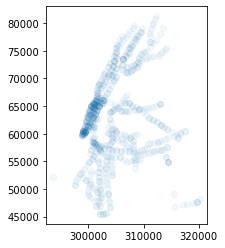

In [79]:
sjoined_mta.plot(alpha=0.05)

In [82]:
sjoined_mta.columns

Index(['Remote', 'Booth', 'stop_id.2013', 'Station.2013', 'Line.2013',
       'Division.2013', 'Station ID', 'Complex ID', 'GTFS Stop ID', 'Division',
       'Line', 'Stop Name', 'Borough', 'Daytime Routes', 'Structure',
       'GTFS Latitude', 'GTFS Longitude', 'North Direction Label',
       'South Direction Label', 'geometry', 'index_right', 'hex_id_8'],
      dtype='object')

In [83]:
sjoined_mta_filtered = sjoined_mta[['Booth','Stop Name','hex_id_8']]

In [84]:
sjoined_mta_filtered.shape

(692, 3)

In [85]:
sjoined_mta_filtered.to_csv('mta_cleaned.csv', encoding='utf-8', index=False)